In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('laptop.csv')

# Menampilkan beberapa baris pertama dari dataset
print(data.head())

   Unnamed: 0.1  Unnamed: 0   brand                                  name  \
0             0           0      HP      Victus 15-fb0157AX Gaming Laptop   
1             1           1      HP                   15s-fq5007TU Laptop   
2             2           2    Acer                  One 14 Z8-415 Laptop   
3             3           3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop   
4             4           4   Apple       MacBook Air 2020 MGND3HN Laptop   

   price  spec_rating                      processor  \
0  49900    73.000000      5th Gen AMD Ryzen 5 5600H   
1  39900    60.000000   12th Gen Intel Core i3 1215U   
2  26990    69.323529  11th Gen Intel Core i3 1115G4   
3  59729    66.000000   12th Gen Intel Core i5 1240P   
4  69990    69.323529                       Apple M1   

                              CPU  Ram Ram_type  ROM ROM_type  \
0           Hexa Core, 12 Threads    8     DDR4  512      SSD   
1  Hexa Core (2P + 4E), 8 Threads    8     DDR4  512      SSD   
2    

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    int64  
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    int64  
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    int64  
 15  resolution_height  893 non-null    int64  
 16  OS                 893 non

<Axes: >

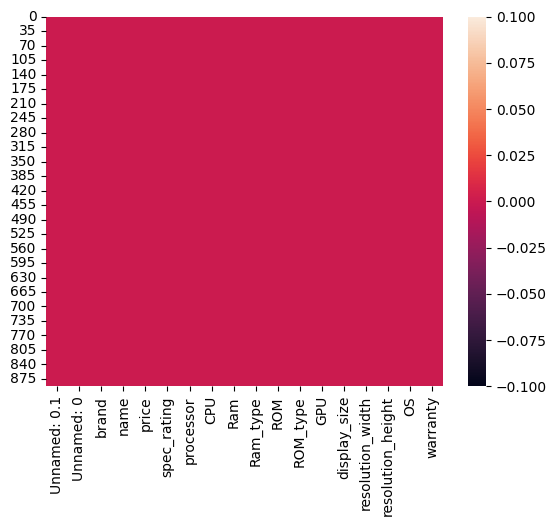

In [ ]:
sns.heatmap(data.isnull())

<ipython-input-42-637c019a88ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

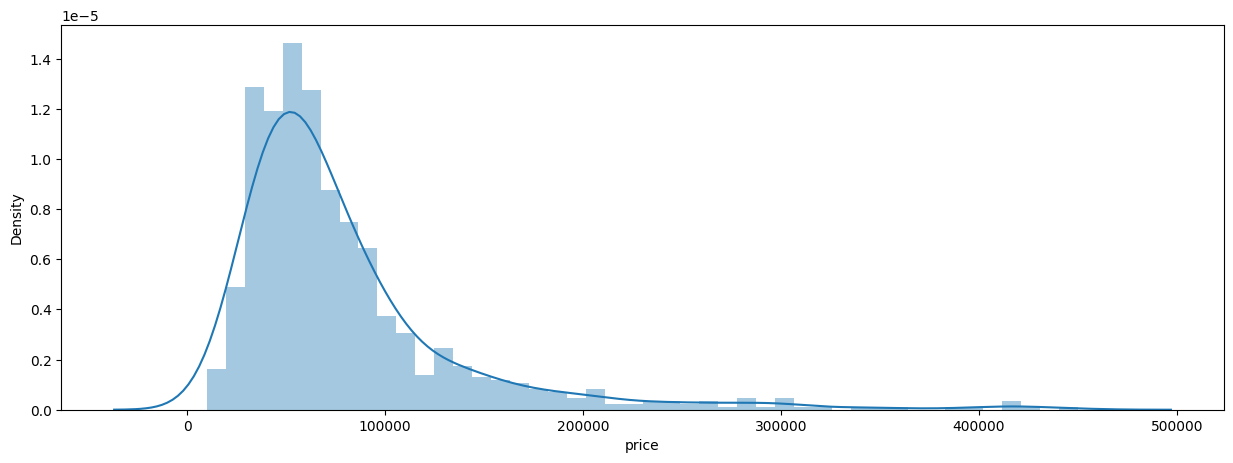

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(data['price'])

##Seleksi fitur

In [ ]:
features = ['Ram', 'ROM', 'display_size']
x = data[features]
y = data['price']
x.shape, y.shape

((893, 3), (893,))

##Split data training dan testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(224,)

##Model regresi linier

In [ ]:
pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 67.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [ ]:
score = lr.score(x_test, y_test)
print('Akurasi model regresi linier  = ', score)

Akurasi model regresi linier  =  0.5690817508016441


##input model regresi linier

In [ ]:
input_data = np.array([[16, 1, 15.6]])

prediction = lr.predict(input_data)
print('estimasi harga laptop = ', prediction)

estimasi harga laptop =  [123436.4701205]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  # for stateless transformers.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')